In [3]:
from models import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_project(data_2d, c_lenth=1, save=None):

    x = data_2d[:,0]
    y = data_2d[:,1]

    if type(c_lenth)==int:
        fig=plt.figure(figsize=(6,6))
        c = plt.scatter(x, y, marker='.', c='black', alpha=0.4)      
    else:
        fig=plt.figure(figsize=(8,6))
        c = plt.scatter(x, y, c=c_lenth, cmap='jet', marker='.')
        plt.colorbar(c)
    if save!=None:
        plt.savefig(save)
    plt.show()

In [39]:
path = '../4-Results/bengal/0926/lat2/'

In [40]:
x_lat = np.load(path+'/x_lat.npy')
sylla_list = np.load(path+'/../pre/sylla_list.npy')

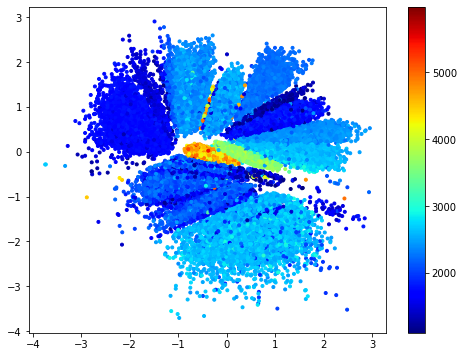

In [41]:
plot_project(x_lat, sylla_list[:,2], save=path+'/plot_Projection_dur')

In [42]:
model = tf.keras.models.load_model(path+'/model.h5', compile=False)

In [43]:
decoder = model.layers[2]

In [57]:
#sample = [[0,3],[0,2], [0,1], [0,0], [0,-1]]
y_sample = np.arange(-2,2,0.21)
#y_sample[20]=0
#y_sample.shape
x_sample = np.zeros(len(y_sample))
x_sample = x_sample+0.2
lat_sample = np.vstack((x_sample, y_sample)).T
lat_sample.shape, lat_sample

((20, 2), array([[ 0.2 , -2.  ],
        [ 0.2 , -1.79],
        [ 0.2 , -1.58],
        [ 0.2 , -1.37],
        [ 0.2 , -1.16],
        [ 0.2 , -0.95],
        [ 0.2 , -0.74],
        [ 0.2 , -0.53],
        [ 0.2 , -0.32],
        [ 0.2 , -0.11],
        [ 0.2 ,  0.1 ],
        [ 0.2 ,  0.31],
        [ 0.2 ,  0.52],
        [ 0.2 ,  0.73],
        [ 0.2 ,  0.94],
        [ 0.2 ,  1.15],
        [ 0.2 ,  1.36],
        [ 0.2 ,  1.57],
        [ 0.2 ,  1.78],
        [ 0.2 ,  1.99]]))

In [80]:

x_sample = np.array([0.2 for i in range(7)])
y_sample = np.array([-0.8, -0.32, -0.11, 0.31, 0.52, 0.73, 1.15])
lat_sample = np.vstack((x_sample, y_sample)).T

In [81]:
decode_sample = decoder.predict(lat_sample)
decode_sample.shape

(7, 128, 64, 1)

(51721,) (51721,)
(7,) (7,)


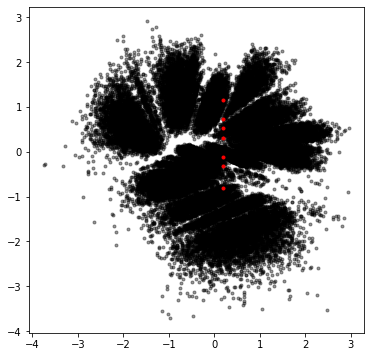

In [82]:
data_2d=x_lat
x = data_2d[:,0]
y = data_2d[:,1]
print(x.shape, y.shape)
fig=plt.figure(figsize=(6,6))
c = plt.scatter(x, y, marker='.', c='black', alpha=0.4)      


x = lat_sample[:,0]
y = lat_sample[:,1]
print(x.shape, y.shape)
c = plt.scatter(x, y, marker='.', c='red')
plt.savefig('%s/plot_continuosScatter'%path)

plt.show()


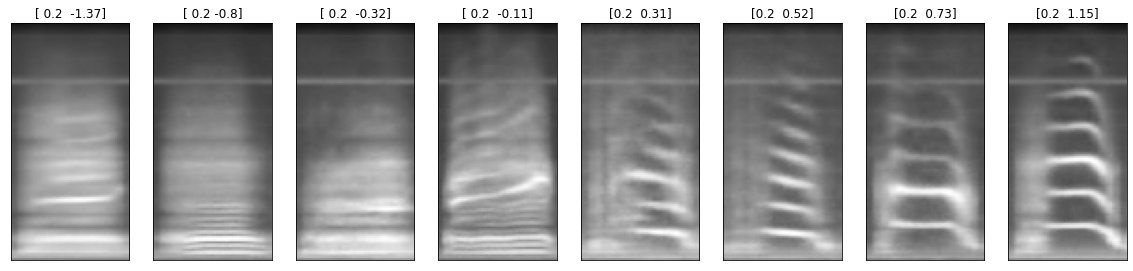

In [79]:
fig = plt.figure(figsize=(20,15))
for idx in range(len(lat_sample)):

    plt.subplot(1,8, idx+1)
    plt.title(lat_sample[idx])
    plt.imshow(decode_sample[idx].reshape(128,64), cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.savefig('%s/plot_continuos'%path)
plt.show()